In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import glob
from sklearn.model_selection import train_test_split

In [19]:
cloudy=glob.glob('cloudy/*jpg')
desert=glob.glob('desert//*jpg')
green_area=glob.glob('green_area//*jpg')
water=glob.glob('water//*jpg')

In [20]:
images = []
labels = []

for i in cloudy:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in desert:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

for i in green_area:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)

for i in water:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)
    
print("Total number of images loaded:", len(images))

Total number of images loaded: 5631


In [21]:
classes={0:'cloudy',1:'desert',2:'green_area',3:'water'}

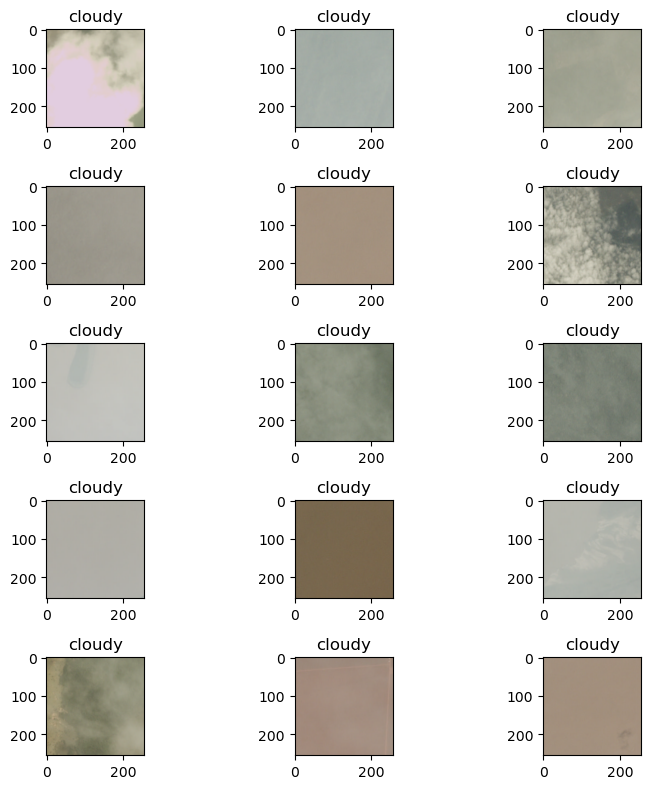

In [22]:
plt.figure(figsize=(8,8))
for i in  range(15):
    plt.subplot(5,3,i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()

In [23]:
images,labels=shuffle(images,labels)

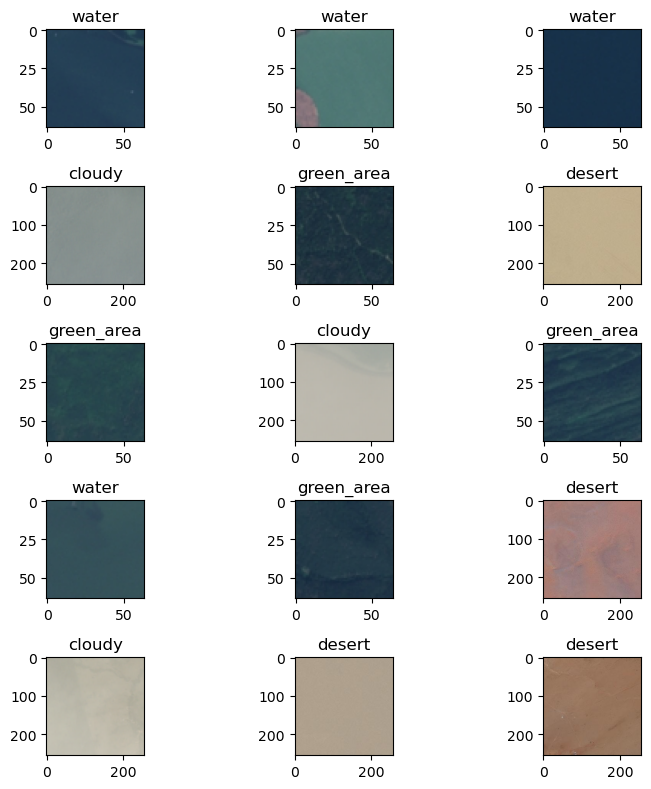

In [24]:
plt.figure(figsize=(8,8))
for i in  range(15):
    plt.subplot(5,3,i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()

In [25]:
X = []

for i in images:
    X.append(resize(i, (64,64,3)))

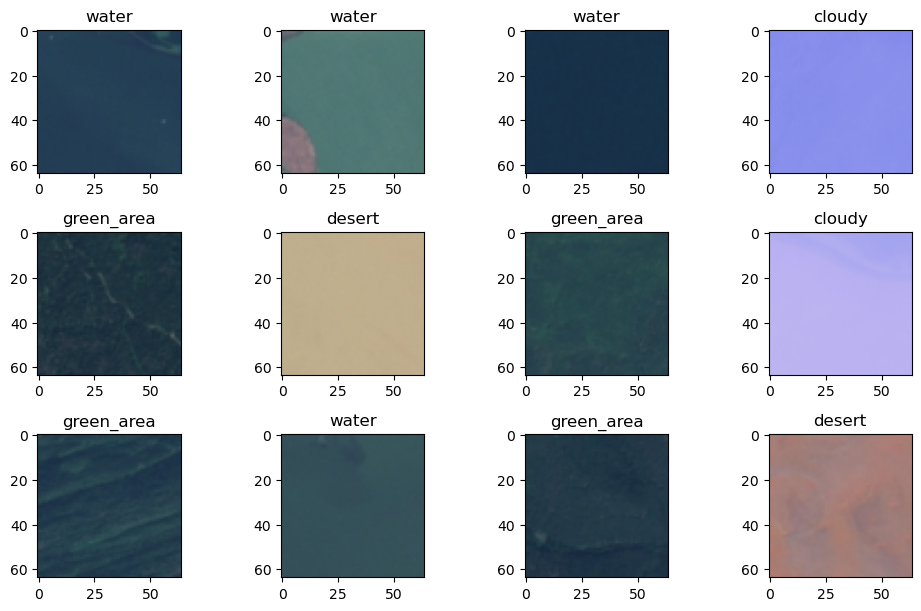

In [26]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [27]:
X = np.array(X)
y = np.array(labels)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [29]:
X_train.shape

(4504, 64, 64, 3)

In [30]:
y_train.shape

(4504,)

In [31]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (64, 64, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(4, activation = 'sigmoid')
])

C:\Users\smart\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [32]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,820 (1.55 MB)

 Trainable params: 406,820 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.fit(X_train,y_train, epochs=10, validation_split=0.1)

Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6592 - loss: 0.6333 - val_accuracy: 0.9091 - val_loss: 0.2457
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8989 - loss: 0.2394 - val_accuracy: 0.9091 - val_loss: 0.1944
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9064 - loss: 0.2157 - val_accuracy: 0.9557 - val_loss: 0.1382
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9245 - loss: 0.1748 - val_accuracy: 0.9135 - val_loss: 0.1975
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9314 - loss: 0.1650 - val_accuracy: 0.9557 - val_loss: 0.1080
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9370 - loss: 0.1476 - val_accuracy: 0.9645 - val_loss: 0.0952
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9362 - loss: 0.1400 - val_accuracy: 0.9734 - val_loss: 0.0949
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9385 - loss: 0.1460 - val_accu

In [35]:
model.evaluate(X_train, y_train)

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9193 - loss: 0.1463


[0.14883628487586975, 0.9200710654258728]

In [36]:
prediction = model.predict(X_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [37]:
pred = [np.argmax(i) for i in prediction]

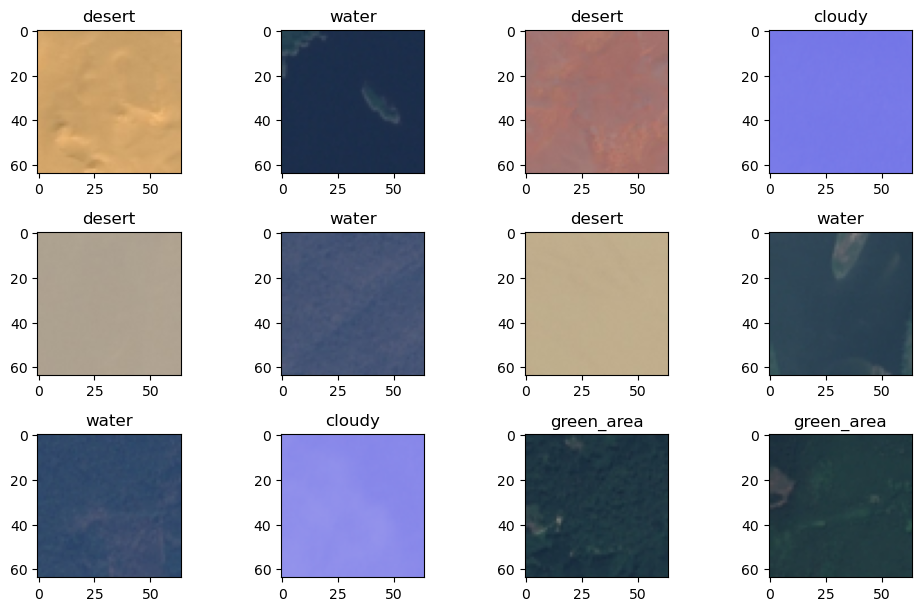

In [38]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(classes[pred[i]])
plt.tight_layout()

In [39]:
accuracy_score(y_test,pred)

0.9192546583850931

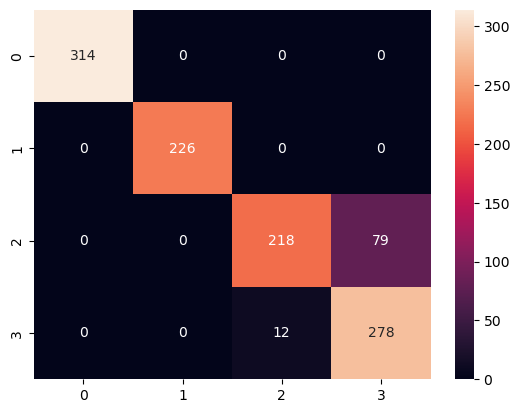

In [40]:
sns.heatmap(confusion_matrix(y_test,pred), annot = True,fmt='d')
plt.show()

In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      1.00      1.00       226
           2       0.95      0.73      0.83       297
           3       0.78      0.96      0.86       290

    accuracy                           0.92      1127
   macro avg       0.93      0.92      0.92      1127
weighted avg       0.93      0.92      0.92      1127

